Buisness Objective:
        
        build the model to classify the House Grades.

In [1]:
#importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report


from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df = pd.read_csv('DS3_C6_S2_Classification_HouseGrade_Data_Project.csv')

In [3]:
df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


In [4]:
#shape
df.shape

(3000, 14)

In [5]:
#summary
df.describe([0.25,0.75,0.90,0.95])

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,1500.500000,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,866.169729,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,1.000000,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,750.750000,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,1500.500000,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,2250.250000,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
90%,2700.100000,354.000000,9.000000,7.000000,7.000000,8.000000,111.000000,116.000000,6.000000,95.000000,6.00000,4537.200000
95%,2850.050000,357.000000,9.000000,8.000000,7.000000,9.000000,116.000000,118.000000,7.000000,97.000000,6.00000,4747.050000
max,3000.000000,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


In [6]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


In [7]:
#checking null values
df.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

There is no null values present in the dataset.

#### EDA

In [8]:
sns.set_style('darkgrid')

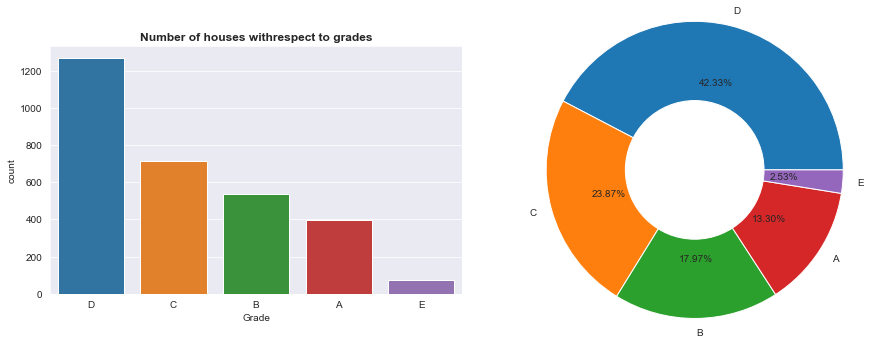

In [9]:

plt.figure(figsize=(13,5))

plt.subplot(121)
sns.countplot(df['Grade'])
plt.title('Number of houses withrespect to grades',fontdict={'fontweight':'bold'})

value = df['Grade'].value_counts()
label = ['D','C','B','A','E']
plt.subplot(122)
plt.pie(value,labels=label,autopct='%.2f%%',radius=1.5)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.tight_layout()
plt.show()

Most number of houses are in D grade which is around 43%.

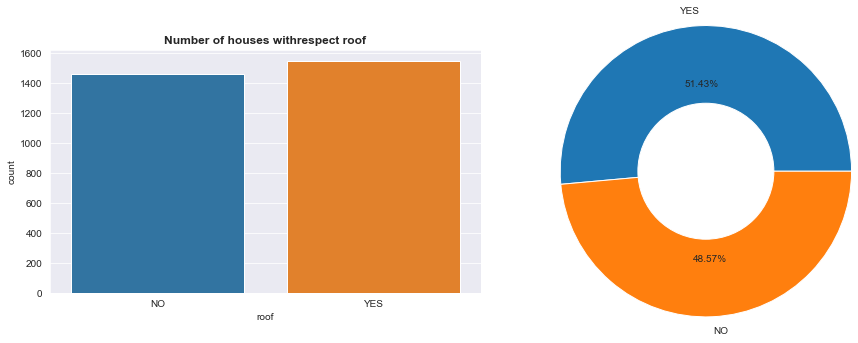

In [10]:
plt.figure(figsize=(13,5))

plt.subplot(121)
sns.countplot(df['roof'])
plt.title('Number of houses withrespect roof',fontdict={'fontweight':'bold'})

value = df['roof'].value_counts()
label = ['YES','NO']
plt.subplot(122)
plt.pie(value,labels=label,autopct='%.2f%%',radius=1.5)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.tight_layout()
plt.show()

Around 52% houses having roofs and 48% houses not having roofs.

In [11]:
numeric_feat = [col for col in df.columns if df[col].dtype =='int64' and not col=='Id']
numeric_feat

['Area(total)',
 'Trooms',
 'Nbedrooms',
 'Nbwashrooms',
 'Twashrooms',
 'Roof(Area)',
 'Lawn(Area)',
 'Nfloors',
 'API',
 'ANB',
 'Expected price']

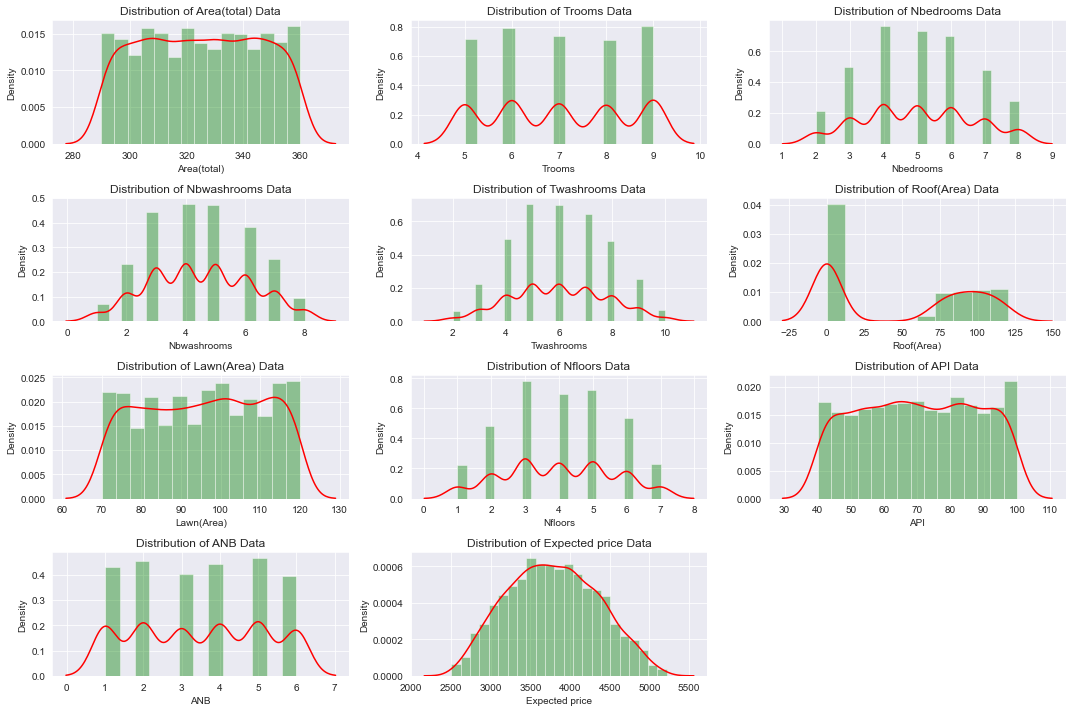

In [12]:
plt.figure(figsize=(15,10))
for i,col in enumerate(numeric_feat,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.distplot(df[col],kde=True,kde_kws={'color':'r'},hist_kws={'color':'g'})
    plt.tight_layout()
    plt.plot()

--> More number of houses having 3 to 5 floors.

--> Most the houses having 5 to 6 washrooms.


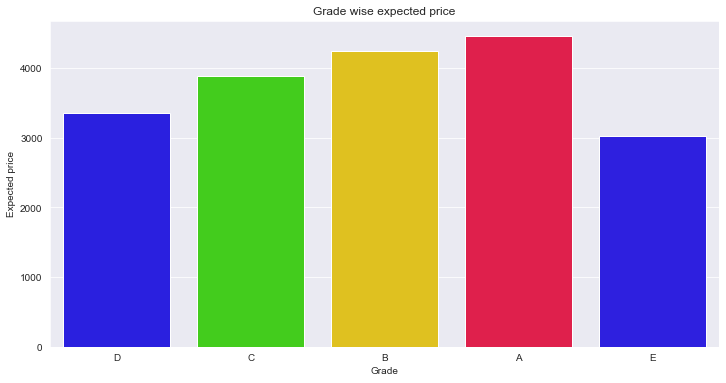

In [13]:
plt.figure(figsize=(12,6))
sns.barplot('Grade','Expected price',data=df,ci=False,palette='prism')
plt.title('Grade wise expected price')
plt.show()

A grade houses are high priced houses and E grade houses are low in price.

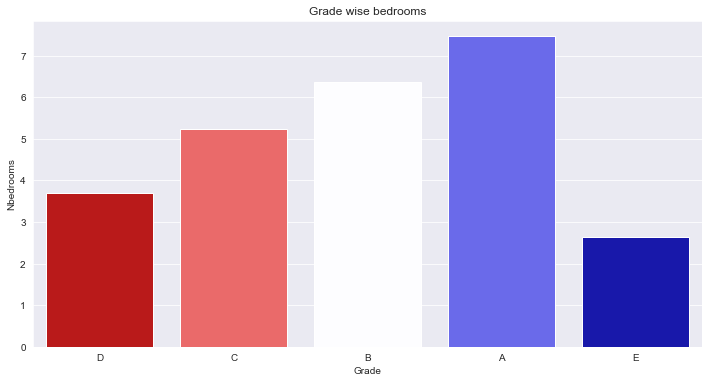

In [14]:
plt.figure(figsize=(12,6))
sns.barplot('Grade','Nbedrooms',data=df,ci=False,palette='seismic_r')
plt.title('Grade wise bedrooms')
plt.show()

A grade houses having more bedrooms compared to other grade houses.

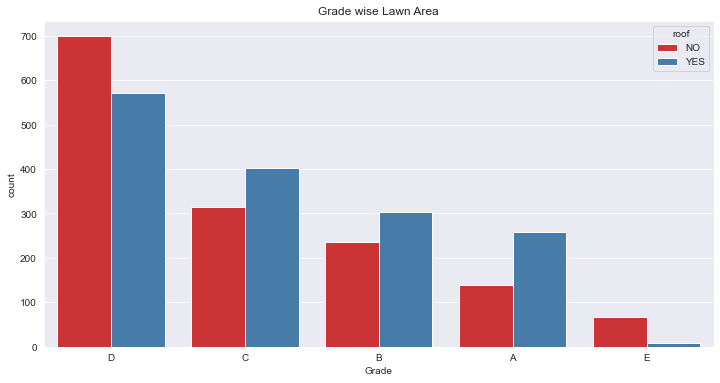

In [15]:
plt.figure(figsize=(12,6))
sns.countplot('Grade',hue='roof',data=df,palette='Set1')
plt.title('Grade wise Lawn Area')
plt.show()

In Higher grade houses A,B and C most number of houses are having Roof.

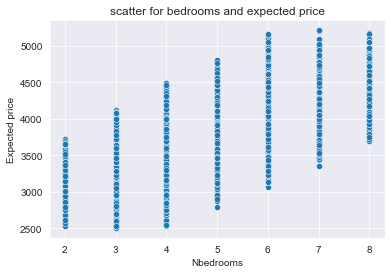

In [16]:
sns.scatterplot('Nbedrooms','Expected price',data=df,)
plt.title('scatter for bedrooms and expected price')
plt.show()

If number of bedrooms increasing expected price also increasing,so number of bedrooms are positively correlated with expected price.

In [17]:
# converting categorical feature to numerical feature by label encoder

encoder = LabelEncoder()
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = encoder.fit_transform(df[i])

In [18]:
df.corr().style.background_gradient(cmap='rainbow')

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
Id,1.000000,0.003186,0.003165,0.004814,0.003496,0.001092,0.011059,0.013046,0.006309,-0.010939,-0.003739,-0.013219,0.009216,-0.006074
Area(total),0.003186,1.000000,0.019041,0.031328,0.031819,0.038509,0.014229,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507,-0.177332
Trooms,0.003165,0.019041,1.000000,0.865878,0.827072,0.794870,0.025142,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170,-0.875145
Nbedrooms,0.004814,0.031328,0.865878,1.000000,0.956578,0.919158,0.023058,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687,-0.865389
Nbwashrooms,0.003496,0.031819,0.827072,0.956578,1.000000,0.960007,0.028549,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659,-0.847319
Twashrooms,0.001092,0.038509,0.794870,0.919158,0.960007,1.000000,0.028212,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627,-0.819280
roof,0.011059,0.014229,0.025142,0.023058,0.028549,0.028212,1.000000,0.976561,-0.004640,0.014985,-0.007983,-0.020511,0.007880,-0.166635
Roof(Area),0.013046,0.017029,0.026550,0.025073,0.028832,0.028763,0.976561,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346,-0.170259
Lawn(Area),0.006309,-0.002118,0.009557,0.000054,0.006617,0.008386,-0.004640,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561,-0.051200
Nfloors,-0.010939,0.016819,0.862367,0.742132,0.711936,0.684966,0.014985,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598,-0.787623


--> Removing Id column because of less correaltion with our target feature.so it wont affect our model.

--> we can remove roof also,because high correaltion with roof(area).And  its showing roof is available or not .By roof area we know roof is available or not.


In [19]:
#dropping id column from the dataset
df = df.drop(columns=['Id','roof',],axis=1)

In [20]:
X = df.drop(columns=['Grade'],axis=1)
y = df['Grade']

In [21]:
#scaling:
scale=MinMaxScaler()
X=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
X

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
0,0.700000,0.25,0.500000,0.428571,0.500,0.000000,0.12,0.166667,0.650000,1.0,0.360251
1,0.971429,0.00,0.333333,0.285714,0.250,0.591667,0.52,0.333333,0.533333,0.6,0.370944
2,0.485714,0.50,0.500000,0.428571,0.375,0.841667,0.94,0.666667,0.400000,0.4,0.458702
3,0.571429,0.25,0.333333,0.285714,0.375,0.841667,0.24,0.166667,0.316667,0.2,0.232301
4,0.428571,0.50,0.333333,0.428571,0.375,0.000000,0.10,0.333333,0.000000,0.0,0.493732
...,...,...,...,...,...,...,...,...,...,...,...
2995,0.728571,1.00,0.666667,0.571429,0.625,0.791667,0.90,0.666667,0.833333,0.2,0.642330
2996,0.028571,1.00,1.000000,0.857143,0.750,0.966667,0.34,1.000000,0.950000,0.6,0.460546
2997,0.542857,0.50,0.333333,0.285714,0.375,0.000000,0.16,0.666667,0.916667,1.0,0.406711
2998,0.042857,1.00,0.833333,0.857143,0.750,0.000000,0.16,1.000000,0.183333,0.4,0.624631


In [22]:
#splitting the data to features and target
x_train1,x_test1,y_train1,y_test1 =  train_test_split(X,y,test_size=0.30,random_state=30)
print('shape of the train and test',x_train1.shape,x_test1.shape)

shape of the train and test (2100, 11) (900, 11)


### Models

In [23]:
#Creating list of models and another list mapped to their names

models=[KNeighborsClassifier(),LogisticRegression(),DecisionTreeClassifier(),
       RandomForestClassifier(),AdaBoostClassifier(),GaussianNB()]

names=['KNeighborsClassifier','Logistic Regression','DecisionTreeClassifier',
       'RandomForestClassifier','AdaBoostClassifier','Naive bayes']

In [24]:
# Function for training the model,predicting the model and evaluating the model

def createmodels(model_list,independent,dependent,n):
    xtrain,xtest,ytrain,ytest=train_test_split(independent,dependent,test_size=0.3,random_state=30)
    name=[]
    accuracyScore=[]
    recallScore=[]
    precisionScore=[]
    f1Score=[]
    mcv=[]
    
    #Creating models
    for i,model in enumerate(model_list):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        cv=RepeatedKFold(n_splits=5,n_repeats=3)
        score=cross_val_score(model,independent,dependent,cv=10)
        
        #Calculating scores of the model and appending them to a list
        name.append(n[i])
        accuracyScore.append(np.round(accuracy_score(ytest, p),4))
        recallScore.append(np.round(recall_score(ytest, p,average='weighted'),4))
        precisionScore.append(np.round(precision_score(ytest, p,average='weighted'),4))
        f1Score.append(np.round(f1_score(ytest, p,average='weighted'),4)*100)
        mcv.append(np.round(np.mean(score),4)*100)
    
    #Creating Dataframe
    data=pd.DataFrame()
    data['Model']=name
    data['accuracy_score']=accuracyScore
    data['recall_score']=recallScore
    data['precision_score']=precisionScore
    data['f1_score']=f1Score
    data['Mean of Cross validaton Score']=mcv
    data.set_index('Model',inplace = True)
    return data

In [25]:
createmodels(models,X,y,names)

,accuracy_score,recall_score,precision_score,f1_score,Mean of Cross validaton Score
Model,,,,,
KNeighborsClassifier,0.8767,0.8767,0.8768,87.51,87.40
Logistic Regression,0.9244,0.9244,0.9261,91.87,92.57
DecisionTreeClassifier,0.8278,0.8278,0.8313,82.89,84.47
RandomForestClassifier,0.8811,0.8811,0.8819,87.72,89.70
AdaBoostClassifier,0.5667,0.5667,0.5750,54.05,60.40
Naive bayes,0.7756,0.7756,0.7913,78.06,80.20


With default hyperparameter, Comparing to all models accuracy and mean cross validation score, logistic regression model has high accuracy score and high mean cross validation score.

In [26]:
# ensemble stacked model
def stacking():
    #base models
    base_models = list()
    base_models.append(('KNC',KNeighborsClassifier()))
    base_models.append(('DTC',DecisionTreeClassifier()))
    base_models.append(('RFC',RandomForestClassifier()))
    base_models.append(('SVC',SVC()))
    #meta_model
    meta = LogisticRegression()
    model = StackingClassifier(estimators=base_models, final_estimator=meta, cv=5)
    return model

In [27]:
model = stacking()

cv=RepeatedKFold(n_splits=5,n_repeats=3)
score = cross_val_score(model, X, y, cv=cv, n_jobs=-1, error_score='raise')
print("Stacking Mean Cross validation score: ",np.mean(score))

Stacking Mean Cross validation score:  0.9467777777777776


By all model accuracy and mean cross validation score, ensemble stacked model has high accuracy and  mean cross validation score also high. Choosing ensemble stacking model as final model.

### Final model-- Ensemble stacked model

In [28]:
# model training
model4 = stacking()
model4.fit(x_train1,y_train1)

StackingClassifier(cv=5,
                   estimators=[('KNC', KNeighborsClassifier()),
                               ('DTC', DecisionTreeClassifier()),
                               ('RFC', RandomForestClassifier()),
                               ('SVC', SVC())],
                   final_estimator=LogisticRegression())

In [29]:
#Accuracy on train dataset
train_accu1=model4.score(x_train1,y_train1)
print("accuracy of model on training dataset: ",train_accu1)

accuracy of model on training dataset:  0.9838095238095238


In [30]:
#Accuracy on test dataset
test_accu1=model4.score(x_test1,y_test1)
print("accuracy of model on test dataset: ",test_accu1)

accuracy of model on test dataset:  0.9411111111111111


In [31]:
#prediction
ypred1=model4.predict(x_test1)

In [34]:
ypred1

array([1, 3, 3, 2, 3, 0, 0, 1, 2, 1, 3, 3, 0, 2, 3, 1, 2, 3, 3, 2, 3, 3,
       0, 0, 3, 3, 1, 3, 2, 1, 2, 3, 3, 1, 3, 2, 3, 2, 3, 3, 0, 2, 2, 3,
       3, 3, 0, 2, 3, 2, 1, 3, 3, 3, 0, 0, 1, 1, 1, 2, 2, 1, 3, 1, 3, 2,
       3, 3, 3, 1, 0, 2, 3, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 1, 3, 1, 3, 1,
       2, 1, 3, 1, 3, 0, 3, 3, 0, 2, 0, 2, 2, 2, 3, 1, 3, 2, 1, 2, 2, 3,
       3, 2, 1, 0, 3, 1, 3, 3, 2, 3, 3, 0, 3, 3, 1, 1, 1, 3, 2, 3, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 2, 1, 1, 3, 1, 3, 1, 4, 3, 3, 2, 3, 0, 0, 0,
       2, 0, 2, 3, 1, 0, 3, 3, 3, 3, 2, 4, 3, 3, 3, 3, 2, 2, 2, 1, 2, 2,
       0, 1, 1, 3, 0, 1, 3, 0, 3, 2, 2, 1, 3, 1, 0, 3, 3, 4, 3, 0, 3, 3,
       1, 2, 0, 2, 1, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 1, 3, 2, 1, 1, 2, 3,
       0, 3, 3, 0, 2, 0, 3, 2, 2, 1, 3, 3, 3, 0, 3, 3, 1, 1, 3, 3, 2, 1,
       0, 3, 3, 3, 1, 0, 3, 1, 3, 3, 3, 3, 3, 1, 3, 4, 3, 4, 3, 1, 1, 3,
       1, 0, 3, 3, 3, 3, 1, 3, 1, 3, 2, 3, 3, 1, 1, 3, 3, 2, 1, 1, 3, 1,
       2, 1, 1, 3, 1, 2, 1, 2, 1, 2, 3, 2, 0, 1, 1,

In [32]:
#evaluation metrices
f1_Score = f1_score(y_test1,ypred1,average='weighted')
accuracy = accuracy_score(y_test1,ypred1)
recall = recall_score(y_test1,ypred1,average='weighted')
precision = precision_score(y_test1,ypred1,average='weighted')

print("Accuracy of stacked model: ",round(accuracy,3))
print("Recall_score: ",round(recall,3))
print("Precision: ",round(precision,3))
print("F1_score: ",round(f1_Score,3))

Accuracy of stacked model:  0.941
Recall_score:  0.941
Precision:  0.942
F1_score:  0.941


In [33]:
print(classification_report(y_test1,ypred1))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       128
           1       0.87      0.94      0.90       159
           2       0.95      0.89      0.92       209
           3       0.96      0.98      0.97       388
           4       1.00      0.69      0.81        16

    accuracy                           0.94       900
   macro avg       0.95      0.89      0.91       900
weighted avg       0.94      0.94      0.94       900



Ensemble stacked model is around 95% correctly classifying house Grades.